## Analyzing and Visualizing Data

In [35]:
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline

## Intruduction and the History in a Nutshell

The Twitter account, [WeRateDogs](https://twitter.com/dog_rates) was started in 2015 to rate users' dogs and make funny comments about the pictures. The dogs are rated from 0 to 10 but a lot of ratings excess the maximum as an inner joke. The account rapidly became popular and after only two years, in October 2017, the account had about 3.75 million followers. It also created some viral memes such as "They are good dogs, Brent" and described the rated dogs as "puppers" and "doggos".

During my project I analyzed the trends, related dog breeds, dog categories, dog rates and dog names, based on the number of favorites and the number of the account's tweets. I was also curios about the account's own categorical system and analyzed the proportions of the dog stages.

#### I. Possible Correlations

I created a correlation matrix to examine the trends between the rating, favorite count and retweet count. Can rating influence popularity or the number of retweets?

Based on my result, there is no correlation between rating, favorite count and retweet count, which is absoluteli makes sense as rating is "only" part of the site's joke. It can alsocan be absolutely random, not reflecting any particular intention. However, we can find a correlation between favorite count and retweet count. That is not surprising: more retweet means more favorites.

In [51]:
df_master = pd.read_csv('twitter_archive_master.csv', date_parser = pd.datetools.to_datetime)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.core.datetools.to_datetime is deprecated. Please use pandas.core.tools.datetimes.to_datetime instead.
  """Entry point for launching an IPython kernel.


In [55]:
df_master.timestamp = pd.to_datetime(df_master.timestamp)

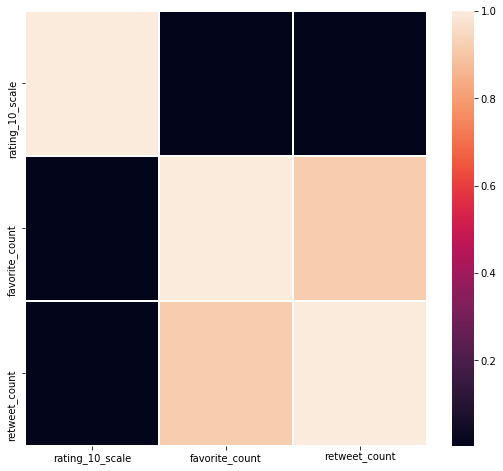

In [37]:
# Creating a smaller df with the numerical values to make a hetmap matrix of the correlations
df_corr_values = df_master[['rating_10_scale', 'favorite_count', 
                               'retweet_count']].copy()

fig, ax = plt.subplots(figsize=(9,8))

corr = df_corr_values.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax,
            linewidth= 0.5);

#### II. Most Popular Dog Names on the Account

I would like to find the most popular dog names. As rating has not anything to do with popularity, in this case, I will rate popularity by the number of tweets, assuming that the most popular dog names occur more times on the site.

The most often tweeted dognames are Charlie, Lucy, Oliver and Cooper. Other names such as Lola, Daisy and Bella are also qiet popular. This trend corresponds my personal experience as I also consider these names popular among dog owners.

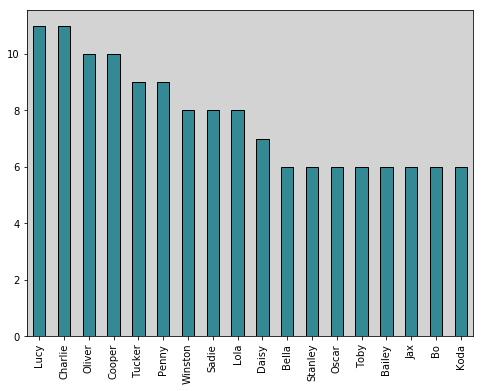

In [38]:
df_name = df_master.groupby('dog_name').filter(lambda x: len(x) >= 6)
fig, ax = plt.subplots(figsize=(8,6))
df_name['dog_name'].value_counts().plot(kind = 'bar', color = "#348A94", ax = ax, edgecolor = ['Black']*len(df_name))
ax.set_facecolor('#D3D3D3')
plt.show();

#### II. Most Beloved Breeds

After that, I analyzed the relationship between the numbers of favorite and dog breeds to find out which dog breeds are the most beloved by the users. I used the most relevant results of the machine learning values, categorized the dog breeds based on pictures. According to my results, golden retrivers are the all time favorites among the users with more than 1600000 favorites, the second and third breeds are labrador retrievers (about 1100000 favorites) and pembrokes (about 1000000 favorites). 

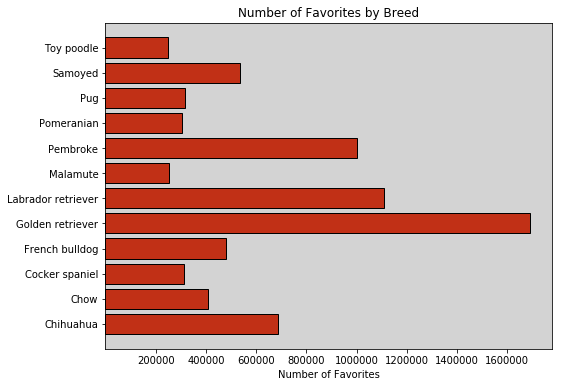

In [39]:
df_breed = df_master.groupby('p1').filter(lambda x: len(x) >= 25)
df_favorite = df_breed.groupby('p1')['favorite_count'].sum().reset_index()
ser_fav = df_favorite['favorite_count']
ser_breed = df_favorite['p1']

fig, ax = plt.subplots(figsize=(8,6))
fav = plt.barh(ser_breed, ser_fav, color = "#C13016", edgecolor = ['Black']*len(ser_breed))
ax.set_facecolor('#D3D3D3')
plt.xlabel('Number of Favorites')
plt.title('Number of Favorites by Breed')
plt.xticks(np.arange(200000, 1800000, 200000))
plt.show();

#### III. Dog Stages

I also found interesting the unique language and expressions the account used over the times to talk aout the dogs. I analyzed the specific "dog stages", excluding the missing values to make a pie chart about the proportions of the categories. The most often used stage is "pupper" with more than 65%, the second one is "doggo" (about 22%). The account owners use the words puppo and floofer in 10% of the cases alltogether.

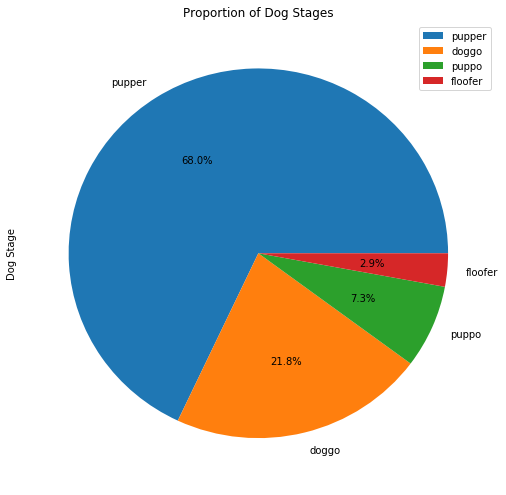

In [40]:
df_stage = df_master[df_master['dog_stage'] != "None"]
fig, ax = plt.subplots(figsize=(8.5,8.5))
df_stage['dog_stage'].value_counts().plot(kind = 'pie', ax = ax, label = 'Dog Stage', autopct='%1.1f%%')
plt.title('Proportion of Dog Stages')
plt.legend();

#### IV. Ratings

I analyzed the portions of the ratings. I decided to use the qcut function to make the parts of the piechart almost equial and better readable. I gave the categories funny names to emphasize that higher rating often means cuter dogs. According to the results, most of the dogs are rated between 0 and 13, only 3% of the dogs are rated higher than 13. However, the highest rate is 1776! The numerators exceed the nominators in 40% of the cases, 40% of the dogs have higher ratings that 10.

In [41]:
# Exclude the negative or null values from the dataframe
df_cuteness = df_master[df_master['rating_10_scale'] > 0]

In [42]:
cute_label = ['Good Dog (0.999, 9.0]', 'Adorable (9.0, 10.0]', 'Supertcute (10.0, 11.0]', 'Unbelieveable (11.0, 12.0]', 'Can I pet her pleeeeease?  (12.0, 13.0]', 'Who is the good boy? (13.0, 1776.0]']

cute_bins = pd.qcut(df_cuteness['rating_10_scale'], 6, labels = cute_label)

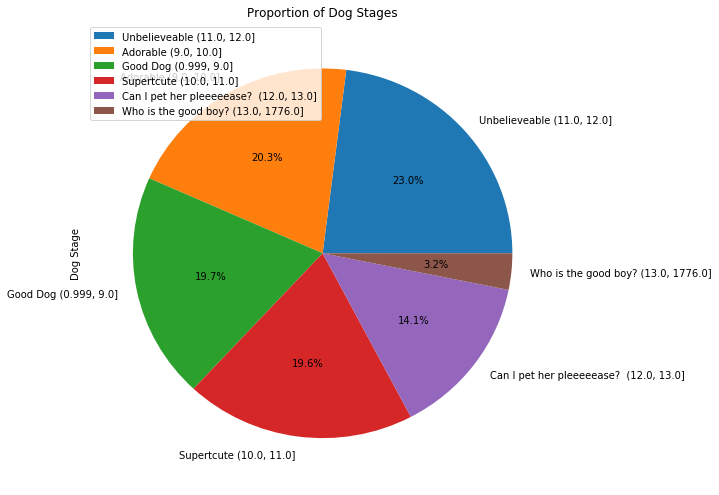

In [43]:
fig, ax = plt.subplots(figsize=(8.5,8.5))
cute_bins.value_counts().plot(kind = 'pie', ax = ax, label = 'Dog Stage', autopct='%1.1f%%')
plt.title('Proportion of Dog Stages')
plt.legend();

### Conclusion 

We got some interesting finding related to the Twitter account WeRateDogs. Some conclusions supported our assumptions and correspond our daily experiences, for example golden retrievers are very popular all over the world and a lot of dog owner name his dog Lucy. But there are other results, telling the own unique story of this rapidly growing account - who wouldn't say that dogs are just too good to be strictly rated on a scale 0-10? 

### Sources:

- https://en.wikipedia.org/wiki/WeRateDogs
- https://twitter.com/dog_rates